# Image Perspective Transformation Example (OpenCV + Matplotlib)

In this notebook, we demonstrate how to perform a **perspective warp** (change the viewpoint of an image) using OpenCV and display the result.

---

## 1. Import Libraries
We need:
- `cv2` (OpenCV) → for reading and transforming the image
- `numpy` → for point arrays
- `matplotlib.pyplot` → for displaying images in the notebook

## 2. Load the Image

We load the image from `assets/image.png`.  
Since OpenCV loads images in **BGR format**, we convert it to **RGB** for correct display in Matplotlib.

## 3. Define Source and Destination Points

- Source points: 4 points in the original image (corners of a region we want to warp).  
- Destination points: 4 points where we want these corners mapped.

This creates a "perspective warp" effect.

## 4. Compute Perspective Transform

We use `cv2.getPerspectiveTransform()` to compute the matrix,  
then apply it with `cv2.warpPerspective()`.

## 5. Show Original and Warped Images Side by Side


## Import Libraries and Image

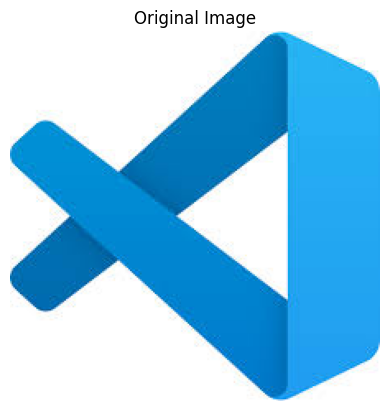

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (convert BGR → RGB for display)
image = cv2.imread("assets/Image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

## Image Perspective

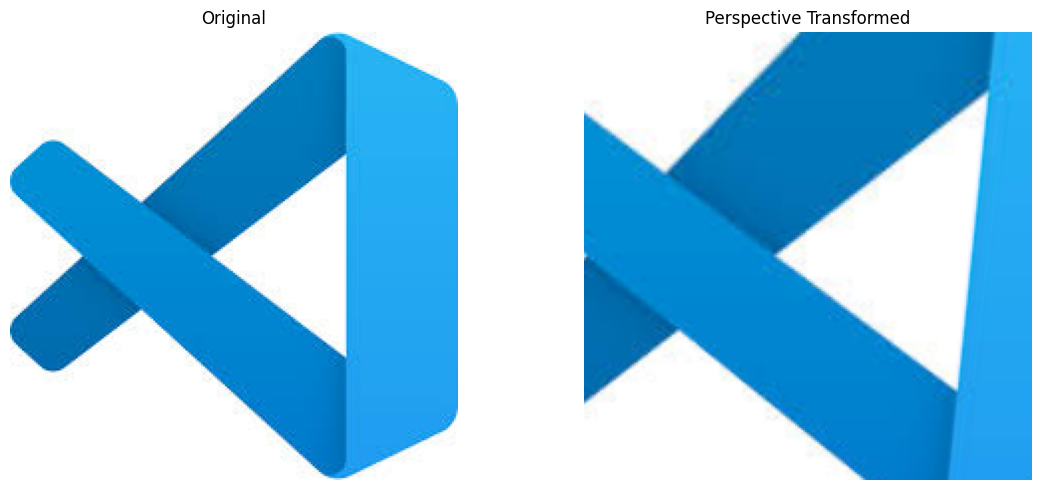

In [3]:
# Image size
h, w = image.shape[:2]

# Define 4 source points (corners of a trapezoid in original image)
src_points = np.float32([
    [w*0.2, h*0.2],  # top-left
    [w*0.8, h*0.2],  # top-right
    [w*0.1, h*0.9],  # bottom-left
    [w*0.9, h*0.9]   # bottom-right
])

# Define 4 destination points (straight rectangle)
dst_points = np.float32([
    [0, 0],
    [w, 0],
    [0, h],
    [w, h]
])

# Compute transformation matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply warp
warped = cv2.warpPerspective(image, matrix, (w, h))

# Display original vs perspective transformed
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(warped)
axes[1].set_title("Perspective Transformed")
axes[1].axis("off")

plt.tight_layout()
plt.show()